# Logistic Regression

## Dataset

### Layout

* Columns:
	* Age
	* EstimatedSalary
	* Purchased
* Rows: 100s of observations
	* Each row represents an observation if a customer purchased older SUVs from the company
		* Features:
			* Age
			* Estimated Salary
		* Dependent variable:
			* Purchased
				* 0 = Not purchased
				* 1 = Purchased

### Background

* One is a data scientist working for one's favorite automobile company
* General manager of the company wants one to predict which previous customers will purchase the brand-new SUV just released by the company
* Marketing team will post ads on social media targeting them at customers likely to purchase the new SUV

### Goals

* Build logistic regression model to predict if a customer will purchase the new SUV

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL.ImageColor import colormap

## Import Dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split Dataset into Training Set and Test Set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [5]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [6]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [7]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
print(X_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [10]:
print(X_test)

[[-0.49618606  0.56021375]
 [ 0.2389044  -0.59133674]
 [-0.03675452  0.18673792]
 [-0.49618606  0.31122986]
 [-0.03675452 -0.59133674]
 [-0.77184498 -1.52502632]
 [-0.40429975 -1.68064126]
 [ 0.05513178  2.33422397]
 [-1.59882175 -0.03112299]
 [ 1.06588117 -0.80919764]
 [-0.49618606 -0.62245972]
 [-0.67995868 -0.43572181]
 [ 0.14701809 -0.43572181]
 [ 0.33079071  0.24898389]
 [-1.41504914  0.52909077]
 [-0.31241345  1.49390334]
 [ 0.14701809  0.24898389]
 [-1.50693545  0.49796778]
 [ 1.80097163  1.89850216]
 [-0.03675452 -1.46278035]
 [-0.03675452 -0.6847057 ]
 [ 1.06588117  2.33422397]
 [ 0.51456332 -0.56021375]
 [ 1.06588117  1.1204275 ]
 [-1.13939022 -1.27604243]
 [ 1.24965379  2.24085501]
 [-0.67995868  0.56021375]
 [-0.58807237  0.34235285]
 [ 0.14701809 -0.2178609 ]
 [-0.31241345  0.52909077]
 [-1.32316283  0.59133674]
 [ 0.14701809  0.31122986]
 [ 1.98474425 -0.28010688]
 [ 0.14701809 -0.49796778]
 [-1.04750391 -0.34235285]
 [-1.59882175 -0.52909077]
 [-1.23127652  0.37347583]
 

## Train Logistic Regression Model on Training Set

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predict Test Set Results

In [12]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


## Make Confusion Matrix

* Shows the number of correct and incorrect predictions
* Shows exactly how many mistakes the model made in its predictions
* Computed to evaluate the accuracy of a classification model

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  6]
 [ 3 19]]


Results:

* $52$ true negatives
* $6$ false positives
* $3$ false negatives
* $19$ true positives

## Compute Accuracy Score

Computes the accuracy of the test set via the following formula:

$Accuracy = Number Of Correct Predictions / Total Number Of Observations$

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8875

Results:

Model is $89\%$ accurate.

## Visualize Training Set Results

* Axes:
    * `x` = **Age**
    * `y` = **Estimated Salary**
* Each data point will be a unique customer
* Notice the prediction regions where the logistic regression model predicts class 0 (customer did not buy the SUV) and class 1 (customer did buy the SUV)
* Notice the curve separating the two regions. This will show the difference between linear and non-linear classifiers.

### Visualization Logic

* `ListedColormap` class from the Matplotlib library creates an object that generates a colormap visual from a list of colors
* `X_set` and `y_set` are assigned non-feature scaled values of the matrix of features and dependent variable from the training set using the `StandardScalar` object `sc` created earlier for feature scaling
    * `X_set` values are inverted from their feature scaled values in `X_train`
    * `y_set` values are not inverted and taken directly from `y_train`
* `meshgrid` function from the NumPy library returns a tuple of coordinate matrices from coordinate vectors
    * 2 sets of matrices (`X1` and `X2`) are returned with coordinate vectors
    * `X1`
        * `arange` function is called with a defined start and stop interval
            * `X_set[:, 0]` returns all the rows for age
            * `start` parameter
                * Start of interval
                * `X_set[:, 0].min()` returns the minimum value for age
                * Value of `10` is subtracted for padding
            * `stop` parameter
                * End of interval
                * `X_set[:, 0].max()` returns the maximum value for age
                * Value of `10` is added for padding
            * `step` parameter
                * Spacing between values
                * Value of `0.25` is added for spacing
    * `X2`
        * `arange` function is called with a defined start and stop interval
            * `X_set[:, 1]` returns all the rows for estimated salary
            * `start` parameter
                * Start of interval
                * `X_set[:, 1].min()` returns the minimum value for estimated salary
                * Value of `1000` is subtracted for padding
                * Value of `1000` is used instead of `10` due to the difference in scaling for estimated salary vs. age
            * `stop` parameter
                * End of interval
                * `X_set[:, 1].max()` returns the maximum value for estimated salary
                * Value of `1000` is added for padding
            * `step` parameter
                * Spacing between values
                * Value of `0.25` is added for spacing
* `contourf` function from the Matplotlib library is used for creating filled contour plots
    * It visualizes 3D data in 2D by drawing filled contours representing constant z-values (heights) on an x-y plane
    * These plots are useful for displaying data like temperature distributions, terrain elevations, or any scalar field where the magnitude varies over 2 dimensions
    * The most basic use case of `contourf` involves providing a 2D array representing the z-values
    * Matplotlib automatically determines the x and y coordinates based on the array's indices
    * `X` and `Y` parameters
        * The coordinates of the values in `Z`
        * `X` and `Y` must both be 2D arrays with the same shape as `Z`
        * `X1` is used for `X` containing age values
        * `X2` is used for `Y` containing estimated salary values
    * `Z` parameter
        * The height values over which the contour is drawn
        * `ravel` function from the NumPy library is used to flatten a multidimensional array into a one-dimensional array
            * `X1` and `X2` are flatten into a 1D array via the `ravel` function
            * They are then combined via the `array` function from the NumPy library into a 2D array
            * The result is then reshaped via the `reshape` function to match the shape of `X1`
        * Since the values of the reshaped 2D array are not feature scaled, the values are feature scaled via the `transform` method on the `sc` object
    * `alpha` parameter
        * The alpha blending value, between `0` (transparent) and `1` (opaque)
        * Value of `0.75` is used to make the blending mostly opaque
    * `cmap` parameter
        * The `Colormap` object instance or registered colormap name used to map scalar data to colors
        * `salmon` and `dodgerblue` are used for a `ListedColormap` object
            * `salmon` = 0 or customer did not buy SUV
            * `dodgerblue` = 1 or customer did buy SUV
* `xlim` function from the Matplotlib library is used to get or set the x-axis limits of the current axes
    * `min()` and `max()` for `X1` are used for the limits
* `ylim` function from the Matplotlib library is used to get or set the y-axis limits of the current axes
    * `min()` and `max()` for `X2` are used for the limits
* The values from `y_set` are iterated over in a for-in loop
    * `unique` function from the NumPy library returns sorted, unique elements of an array
        * Values of `y_set` are made unique and sorted
    * Iterator variable `i` represents the current row of iteration
    * Iterator variable `j` represents the classification value for the dependent variable
        * `0` customer did not buy SUV
        * `1` customer did buy SUV
* `scatter` method from the Matplotlib library creates a scatter plot of data points with the shaded contour showing the classification for the dependent variable
    * x-axis uses values from `X_set` where `y_set` value = 0 (customer did not buy SUV)
    * y-axis uses values from `X_set` where `y_set` value = 1 (customer did buy SUV)
    * `c` parameter
        * The marker colors
        * Uses the `ListedColormap` with the classification colors for the current row at index `i`
    * `label` parameter
        * Sets the label
        * Values
            * `0` customer did not buy SUV
            * `1` customer did buy SUV

/var/folders/12/tsb5ccqx5_32fy1lg_yqpddh0000gn/T/ipykernel_97218/2851755308.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = cmap(i), label = j)


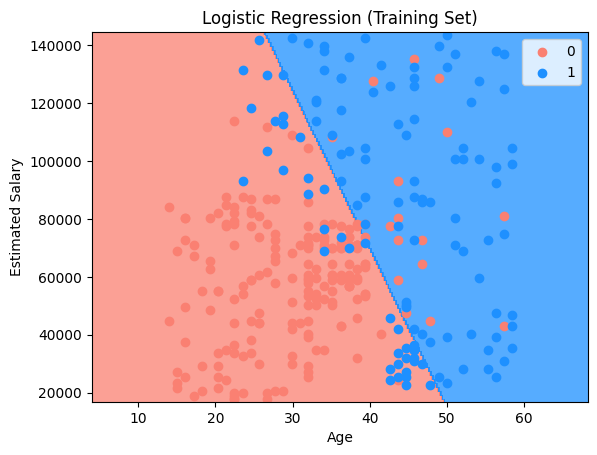

In [18]:
from matplotlib.colors import ListedColormap

def display_classification_plot(x_vals, y_vals, feature_scaler: StandardScaler, c: LogisticRegression, cmap: ListedColormap, title, x_label, y_label):
    x_set, y_set = feature_scaler.inverse_transform(x_vals), y_vals
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 0.25),
                         np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))
    plt.contourf(x1, x2, c.predict(feature_scaler.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha = 0.75, cmap = cmap)
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = cmap(i), label = j)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

/var/folders/12/tsb5ccqx5_32fy1lg_yqpddh0000gn/T/ipykernel_97218/2851755308.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = cmap(i), label = j)


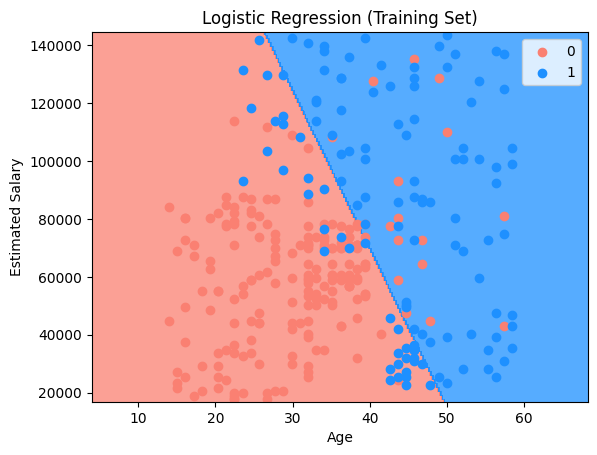

In [19]:
display_classification_plot(X_train, y_train, sc, classifier, ListedColormap(('salmon', 'dodgerblue')), 'Logistic Regression (Training Set)', 'Age', 'Estimated Salary')

## Visualize Test Set Results

/var/folders/12/tsb5ccqx5_32fy1lg_yqpddh0000gn/T/ipykernel_97218/2851755308.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = cmap(i), label = j)


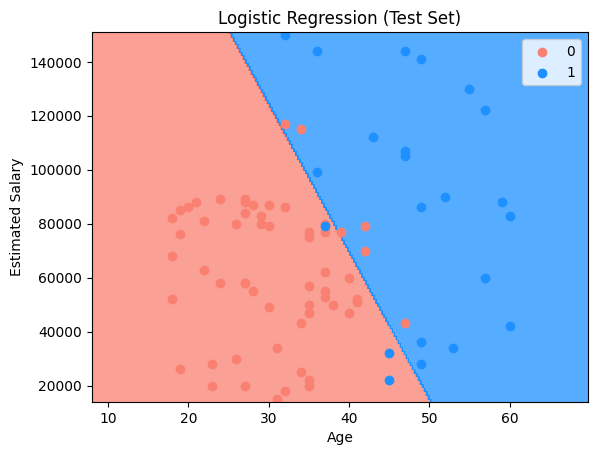

In [20]:
display_classification_plot(X_test, y_test, sc, classifier, ListedColormap(('salmon', 'dodgerblue')), 'Logistic Regression (Test Set)', 'Age', 'Estimated Salary')

## Interpreting Results

* The following items outline the 2D plots:
	* Red region represents 0 classifier (customer did not buy SUV)
	* Blue region represents 1 classifier (customer did buy SUV)
	* Each data point represents one customer
	* Red data points = 0 classifier
	* Blue data points = 1 classifier
* Correct prediction data points are where data point color is same as the region
* Incorrect prediction data points are where data point color is different from the region
* Prediction boundary is the boundary between red and blue prediction regions
	* Where the classifier separates 2 classes
* **Prediction curve of the logistic regression model is a straight line because the model is a linear classifier**
* For any linear classifier, the prediction boundary (curve) will always be a straight line

## Takeaways

* Logistic regression model is very good at separating the 2 classes and making good predictions
* To build a model with less prediction errors, one will need a prediction boundary other than a straight line
	* Would need a prediction curve that catches all the red data points in the red region
	* Then leave all the blue data points in the blue region
	* This is possible with non-linear classifiers

## Predict New Result

In [17]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]
